# Homework 3: Convolutional Neural Networks

Due Wednesday 11/24 at 11:59 pm EST

Download the dataset `cats-notcats` from github (given as a part of the assignment). This dataset has images of cats and images that are not cats (in separate folders). The task is to train a convolutional neural network (CNN) to build a classifier that can classify a new image as either `cat` or `not cat`

In [128]:
import PIL
import shutil
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Embedding,Flatten, LSTM, Dense, Input, MaxPooling2D, Conv2D, Concatenate, Activation
from tensorflow.keras.activations import softmax
from tensorflow.keras.preprocessing.image import ImageDataGenerator


1. Load the dataset and create three stratified splits - train/validation/test in the ratio of 70/10/20. 

In [113]:
#code here
base_dir_cats = '/Users/rahulsubramaniam/assignment-3-rs4128/data/cats-notcats/cats/'
base_dir_notcats = '/Users/rahulsubramaniam/assignment-3-rs4128/data/cats-notcats/notcats/'
base_dir_train = '/Users/rahulsubramaniam/assignment-3-rs4128/data/cats-notcats/train/'
base_dir_val = '/Users/rahulsubramaniam/assignment-3-rs4128/data/cats-notcats/val/'
base_dir_test = '/Users/rahulsubramaniam/assignment-3-rs4128/data/cats-notcats/test/'

cat_image_names = os.listdir(base_dir_cats)
cat_image_names = filter(lambda cat_image_name: cat_image_name.endswith('.jpg'),cat_image_names )
notcat_image_names = os.listdir(base_dir_notcats)
notcat_image_names = filter(lambda notcat_image_name: notcat_image_name.endswith('.jpg'),notcat_image_names )
cat_image_paths = [base_dir_cats + s for s in cat_image_names]
not_cat_image_paths = [base_dir_notcats + s for s in notcat_image_names]
os.mkdir(base_dir_train)
os.mkdir(base_dir_val)
os.mkdir(base_dir_test)


In [114]:
def get_image(image_name,base_dir):
    image = PIL.Image.open(os.path.join(base_dir, image_name))
    return np.asarray(image.resize((40,40))) / 255.0

def get_image_with_path(image_path):
    image = PIL.Image.open(image_path)
    return np.asarray(image.resize((40,40))) / 255.0

def img_generator(img_list):
  
  for img_val in img_list:
    img = get_image(img_val)
    yield np.array([img])
    


In [115]:
cats_df = pd.DataFrame({'image_path':cat_image_paths,'is_cat':[1]*len(cat_image_paths)})
notcats_df = pd.DataFrame({'image_path': not_cat_image_paths,'is_cat':[0]*len(not_cat_image_paths)})
df = pd.concat([cats_df,notcats_df],axis=0)
X_dev,X_test,y_dev,y_test = train_test_split(df['image_path'],df['is_cat'],test_size=0.2,stratify=df['is_cat'])
X_train,X_val,y_train,y_val = train_test_split(X_dev,y_dev,test_size=0.125,stratify=y_dev)

In [116]:
y_train

1410    0
1783    1
1053    0
540     0
1571    1
       ..
3540    1
3139    1
1208    1
1499    1
1278    0
Name: is_cat, Length: 3896, dtype: int64

In [117]:
cat_dir = 'isCat/'
notcat_dir = 'isNotCat/'
for i in range(len(list(X_train))):
    image_path = list(X_train)[i]
    splits = image_path.split('/')
    if list(y_train)[i] ==1:
        shutil.copy(image_path,base_dir_train+cat_dir+splits[len(splits)-1])
    else:
        shutil.copy(image_path,base_dir_train+notcat_dir+splits[len(splits)-1])
for i in range(len(list(X_val))):
    image_path = list(X_val)[i]
    splits = image_path.split('/')
    if list(y_val)[i] ==1:
        shutil.copy(image_path,base_dir_val+cat_dir+splits[len(splits)-1])
    else:
        shutil.copy(image_path,base_dir_val+notcat_dir+splits[len(splits)-1])
    
for i in range(len(list(X_test))):
    image_path = list(X_test)[i]
    splits = image_path.split('/')
    if list(y_test)[i] ==1:
        shutil.copy(image_path,base_dir_test+cat_dir+splits[len(splits)-1])
    else:
        shutil.copy(image_path,base_dir_test+notcat_dir+splits[len(splits)-1])
    

In [122]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(base_dir_train,target_size=(40,40),batch_size=20,class_mode='binary')
val_generator = test_datagen.flow_from_directory(base_dir_val,target_size=(40,40),batch_size=20,class_mode='binary')

Found 3896 images belonging to 2 classes.
Found 557 images belonging to 2 classes.


2. Create a CNN that has the following hidden layers:

    a. 2D convolution layer with a 3x3 kernel size, has 128 filters, stride of 1 and padded to yield the same size as input, followed by a ReLU activation layer
    
    b. Max pooling layer of 2x2
    
    c. Dense layer with 128 dimensions and ReLU as the activation layer

In [135]:
#code here
model = Sequential()
model.add(Conv2D(128,(3,3),strides=(1, 1),padding='same',input_shape=(40,40,3),name='conv_layer_1'))
model.add(MaxPooling2D((2,2),name='maxpool_1'))
model.add(Flatten())
model.add(Dense(128,activation='relu',name='dense_1'))
model.add(Dense(1,activation='sigmoid',name='output'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [136]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_layer_1 (Conv2D)        (None, 40, 40, 128)       3584      
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 20, 20, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               6553728   
_________________________________________________________________
output (Dense)               (None, 1)                 129       
Total params: 6,557,441
Trainable params: 6,557,441
Non-trainable params: 0
_________________________________________________________________


3. Train the classifier for 20 epochs with 100 steps per epoch. Also use the validation data during training the estimator.

In [137]:
#code here
history = model.fit_generator(train_generator,steps_per_epoch = 100, validation_data=val_generator,validation_steps=14, verbose = True, epochs = 20)

Epoch 1/20
100/100 [==============================] - 9s 85ms/step - loss: 0.7317 - accuracy: 0.7440 - val_loss: 0.4857 - val_accuracy: 0.7929
Epoch 2/20
100/100 [==============================] - 8s 79ms/step - loss: 0.4314 - accuracy: 0.8230 - val_loss: 0.4681 - val_accuracy: 0.8071
Epoch 3/20
100/100 [==============================] - 7s 75ms/step - loss: 0.3933 - accuracy: 0.8465 - val_loss: 0.4799 - val_accuracy: 0.7786
Epoch 4/20
100/100 [==============================] - 7s 69ms/step - loss: 0.3767 - accuracy: 0.8497 - val_loss: 0.4780 - val_accuracy: 0.8107
Epoch 5/20
100/100 [==============================] - 7s 70ms/step - loss: 0.3107 - accuracy: 0.8765 - val_loss: 0.5355 - val_accuracy: 0.7393
Epoch 6/20
100/100 [==============================] - 7s 70ms/step - loss: 0.3225 - accuracy: 0.8742 - val_loss: 0.4711 - val_accuracy: 0.8143
Epoch 7/20
100/100 [==============================] - 7s 70ms/step - loss: 0.3121 - accuracy: 0.8758 - val_loss: 0.5847 - val_accuracy: 0.7786

4. Plot the accuracy and the loss over epochs for train & validation sets

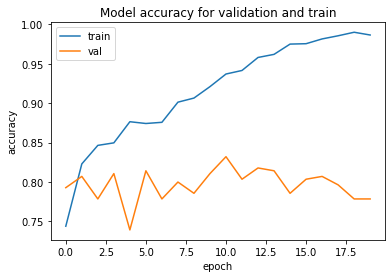

In [146]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy for validation and train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

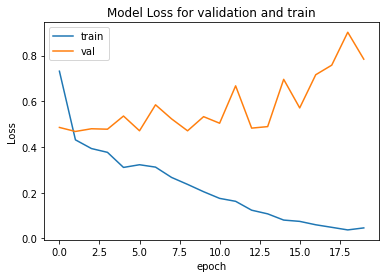

In [147]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss for validation and train')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['train','val'])
plt.show()

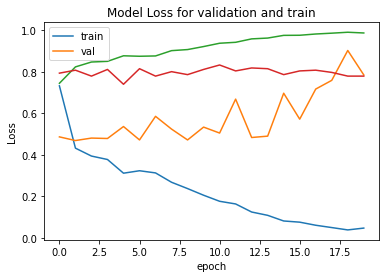

In [148]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Loss for validation and train')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['train','val'])
plt.show()

5. Add the following layers to (2) before the dense layer:

    a. 2D convolution layer with a 3x3 kernel size, has 64 filters, stride of 1 and padded to yield the same size as input, followed by a ReLU activation layer
    
    b. Max pooling layer of 2x2
    
    c. 2D convolution layer with a 3x3 kernel size, has 32 filters, stride of 1 and padded to yield the same size as input, followed by a ReLU activation layer
    
    d. Max pooling layer of 2x2
    
    e. Dense layer with 256 dimensions and ReLU as the activation layer

In [151]:
#code here
model = Sequential()
model.add(Conv2D(64,(3,3),strides=(1, 1),padding='same',input_shape=(40,40,3),name='conv_layer_1',activation='relu'))
model.add(MaxPooling2D((2,2),name='maxpool_1'))
model.add(Conv2D(32,(3,3),strides=(1, 1),padding='same',name='conv_layer_2',activation='relu'))
model.add(MaxPooling2D((2,2),name='maxpool_2'))
model.add(Flatten())
model.add(Dense(256,activation='relu',name='dense_1'))
model.add(Dense(1,activation='sigmoid',name='output'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

6. Train the classifier again for 20 epochs with 100 steps per epoch. Also use the validation data during training the estimator.

In [152]:
#code here
history = model.fit_generator(train_generator,steps_per_epoch = 100, validation_data=val_generator,validation_steps=14, verbose = True, epochs = 20)

Epoch 1/20
100/100 [==============================] - 13s 116ms/step - loss: 0.5479 - accuracy: 0.7525 - val_loss: 0.5044 - val_accuracy: 0.7964
Epoch 2/20
100/100 [==============================] - 11s 111ms/step - loss: 0.4521 - accuracy: 0.8176 - val_loss: 0.4344 - val_accuracy: 0.8071
Epoch 3/20
100/100 [==============================] - 8s 80ms/step - loss: 0.3924 - accuracy: 0.8467 - val_loss: 0.4266 - val_accuracy: 0.8321
Epoch 4/20
100/100 [==============================] - 8s 81ms/step - loss: 0.3495 - accuracy: 0.8622 - val_loss: 0.4362 - val_accuracy: 0.8143
Epoch 5/20
100/100 [==============================] - 8s 82ms/step - loss: 0.3778 - accuracy: 0.8432 - val_loss: 0.3974 - val_accuracy: 0.8500
Epoch 6/20
100/100 [==============================] - 8s 79ms/step - loss: 0.3418 - accuracy: 0.8567 - val_loss: 0.3611 - val_accuracy: 0.8464
Epoch 7/20
100/100 [==============================] - 11s 110ms/step - loss: 0.3188 - accuracy: 0.8662 - val_loss: 0.3961 - val_accuracy: 

7. Plot the accuracy and the loss over epochs for train & validation sets

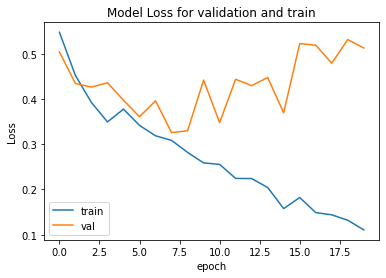

In [153]:
#code here
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss for validation and train')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['train','val'])
plt.show()

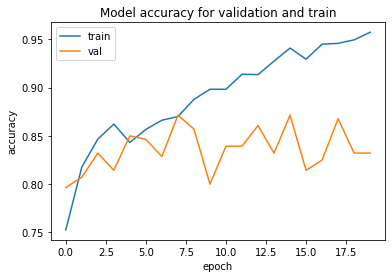

In [154]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy for validation and train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [68]:
# train_image_arrays = np.empty(shape=[299,299,3])
# for image_path in X_train:
#     image_array = get_image_with_path(image_path)
#     #train_image_arrays = np.append(train_image_arrays,image_array,axis = 0)
#     train_image_arrays =  np.vstack((train_image_arrays,image_array))
# train_image_arrays